In [1]:
%config Completer.use_jedi = False

import configparser
config = configparser.ConfigParser()
config.read('agg-config.txt')


time_step = int(config.get('Configuration', 'time_step'))
time_step2 = int(config.get('Configuration', 'time_step2'))

window_size = int(config.get('Configuration', 'window_size'))
processed_data_folder = config.get('Configuration', 'processed_data_folder')
raw_data_folder = config.get('Configuration', 'raw_data_folder')

ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

activities=config.get('Configuration', 'learn_activities')
activities = [(item.strip()) for item in activities.split(',')]

cross_days=config.get('Configuration', 'cross_days')
cross_days = [(item.strip()) for item in cross_days.split(',')]

sensors=config.get('Configuration', 'sensors')
sensors = [(item.strip()) for item in sensors.split(',')]

w = int(config.get('Configuration', 'w'))
h = int(config.get('Configuration', 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)

{'ed9c': 'green', '0001': 'blue', '3d57': 'red'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(t0,tN,ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(t0,tN,tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


def day_time0(t0,tN,ti):
    return day_time(ti)-day_time(t0)+1

def relT(t0,tN,ti):
    return (int)((ti-t0)/time_step2)

def sizeT(t0,tN):
    return relT(t0,tN,tN)+1


def initTime(ini_date,end_date):
    tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())

    t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
    print (ini_date,"Init date is", t0, "day:",day_time(t0,tN,t0), time2str(t0,tN,t0))
    print (end_date,"End date is", tN, "day:",day_time(t0,tN,tN), time2str(t0,tN,tN))

    day=list(range(day_time(t0,tN,t0),day_time(t0,tN,tN)+1))[0]
    return day,t0,tN
    
initTime(ini_date,end_date)


2024-07-05 02:00:00 Init date is 1720137600 day: 19909 2024-07-05 02:00:00
2024-07-06 01:59:59 End date is 1720223999 day: 19910 2024-07-06 01:59:59


(19909, 1720137600, 1720223999)

In [3]:
from datetime import datetime, timedelta

days=[]
t0N_days={}

for cross_day in cross_days:
    print(cross_day)
    # Convertir las fechas a objetos datetime
    ini_date_dt = datetime.strptime(ini_date, "%Y-%m-%d %H:%M:%S")
    end_date_dt = datetime.strptime(end_date, "%Y-%m-%d %H:%M:%S")
    cross_day_dt = datetime.strptime(cross_day, "%Y-%m-%d")

    # Reemplazar el día manteniendo la hora original
    new_ini_date = cross_day_dt.replace(hour=ini_date_dt.hour, minute=ini_date_dt.minute, second=ini_date_dt.second)
    new_end_date = cross_day_dt.replace(hour=end_date_dt.hour, minute=end_date_dt.minute, second=end_date_dt.second) + timedelta(days=1)

    # Convertir las fechas de nuevo a cadena si es necesario
    new_ini_date_str = new_ini_date.strftime("%Y-%m-%d %H:%M:%S")
    new_end_date_str = new_end_date.strftime("%Y-%m-%d %H:%M:%S")

    print(f"New ini_date: {new_ini_date_str}")
    print(f"New end_date: {new_end_date_str}")
    day,t0,tN=initTime(new_ini_date_str,new_end_date_str)
    days.append(day)
    t0N_days[day]=(t0,tN)
    

print(days)
print(t0N_days)



2024-07-05
New ini_date: 2024-07-05 02:00:00
New end_date: 2024-07-06 01:59:59
2024-07-05 02:00:00 Init date is 1720137600 day: 19909 2024-07-05 02:00:00
2024-07-06 01:59:59 End date is 1720223999 day: 19910 2024-07-06 01:59:59
2024-07-06
New ini_date: 2024-07-06 02:00:00
New end_date: 2024-07-07 01:59:59
2024-07-06 02:00:00 Init date is 1720224000 day: 19910 2024-07-06 02:00:00
2024-07-07 01:59:59 End date is 1720310399 day: 19911 2024-07-07 01:59:59
2024-07-07
New ini_date: 2024-07-07 02:00:00
New end_date: 2024-07-08 01:59:59
2024-07-07 02:00:00 Init date is 1720310400 day: 19911 2024-07-07 02:00:00
2024-07-08 01:59:59 End date is 1720396799 day: 19912 2024-07-08 01:59:59
[19909, 19910, 19911]
{19909: (1720137600, 1720223999), 19910: (1720224000, 1720310399), 19911: (1720310400, 1720396799)}


(8, 3, 3, 1440)
 resting
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.resting.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.resting.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.resting.tsv


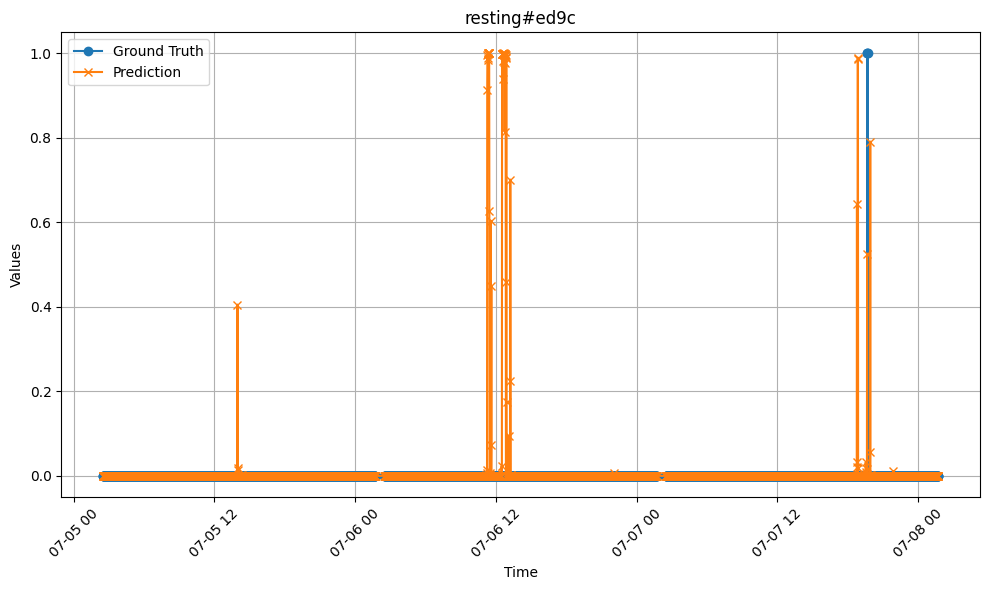

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.resting.tsv
./data-har//DAY_19910/act/PREDICTION.0001.resting.tsv
./data-har//DAY_19911/act/PREDICTION.0001.resting.tsv


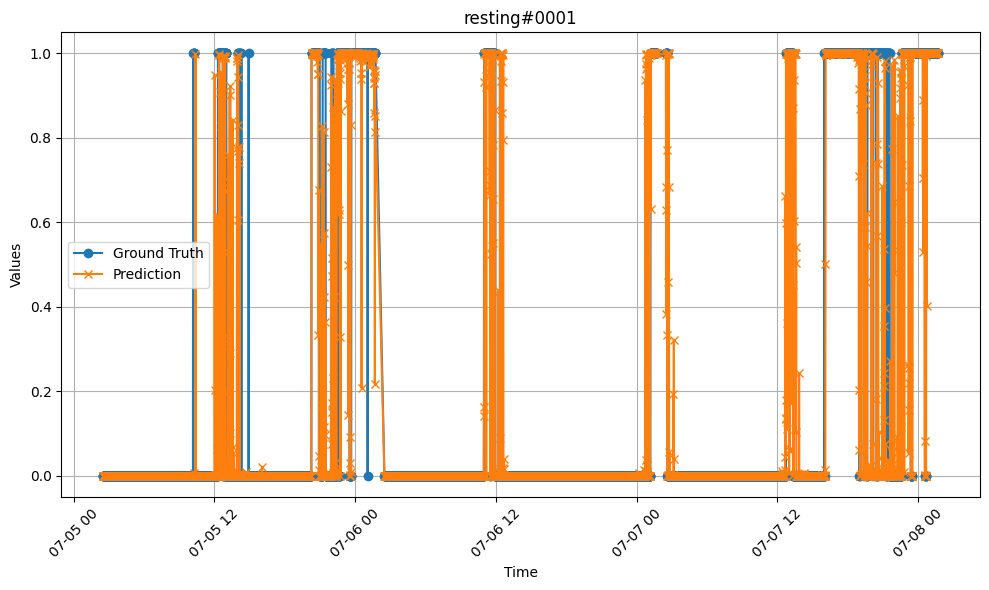

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.resting.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.resting.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.resting.tsv


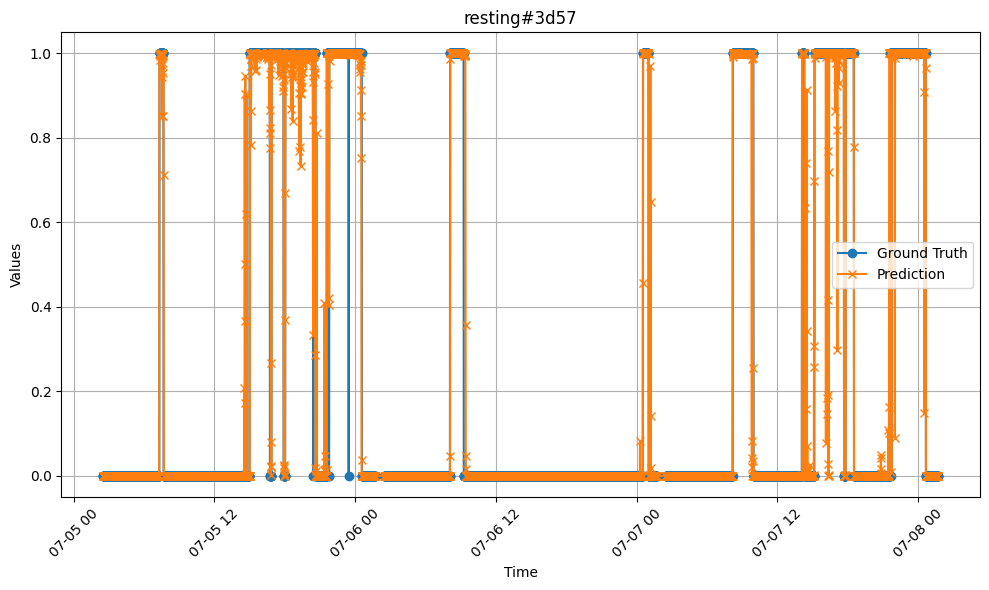

 cooking
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.cooking.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.cooking.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.cooking.tsv


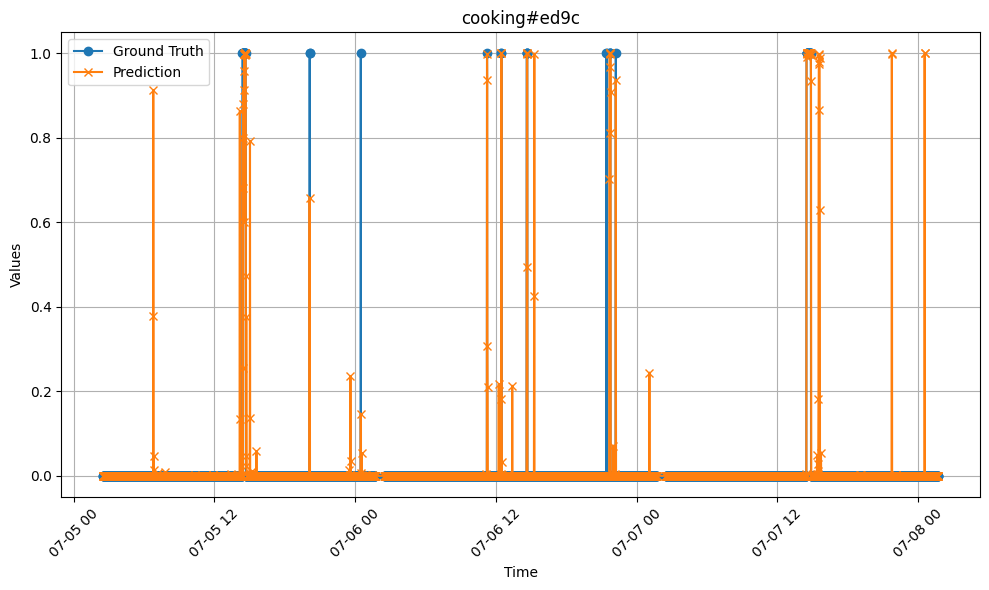

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.cooking.tsv
./data-har//DAY_19910/act/PREDICTION.0001.cooking.tsv
./data-har//DAY_19911/act/PREDICTION.0001.cooking.tsv


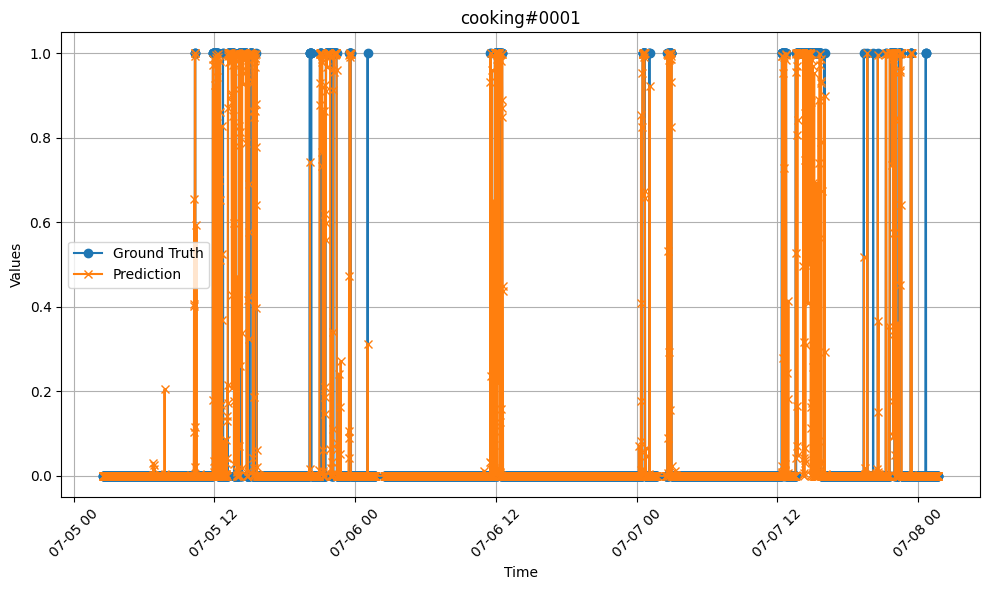

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.cooking.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.cooking.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.cooking.tsv


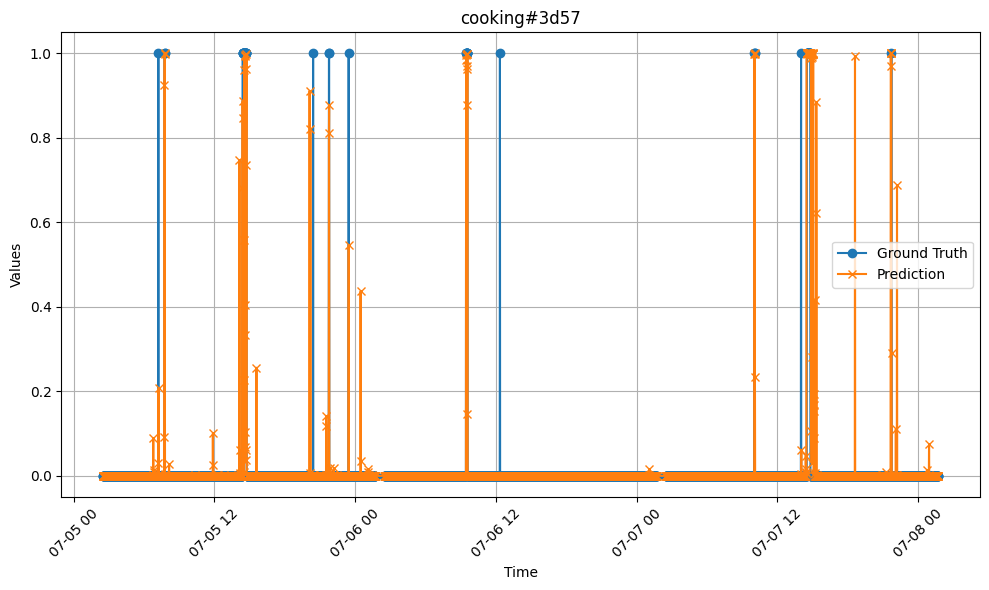

 exit
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.exit.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.exit.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.exit.tsv


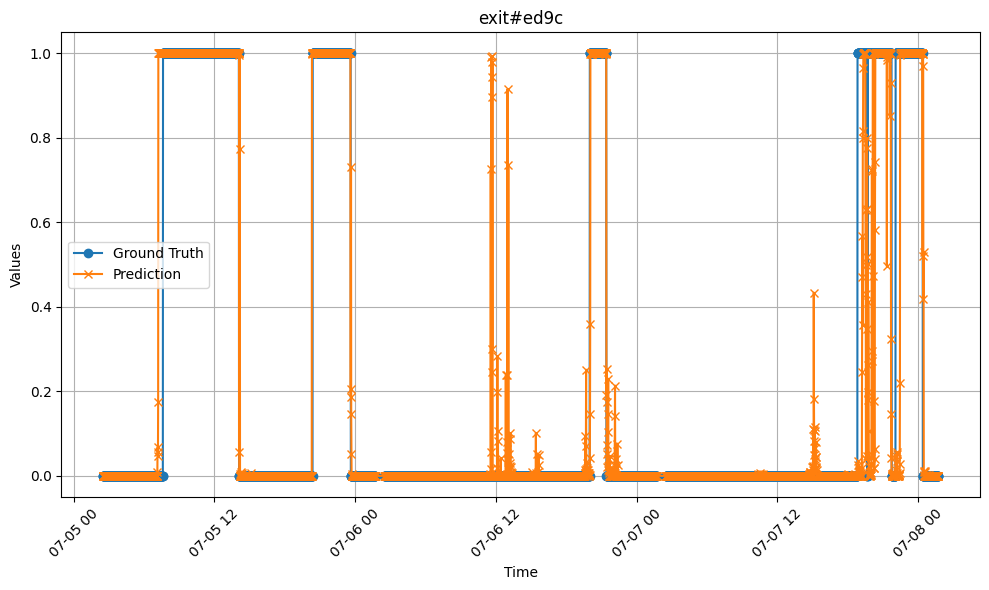

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.exit.tsv
./data-har//DAY_19910/act/PREDICTION.0001.exit.tsv
./data-har//DAY_19911/act/PREDICTION.0001.exit.tsv


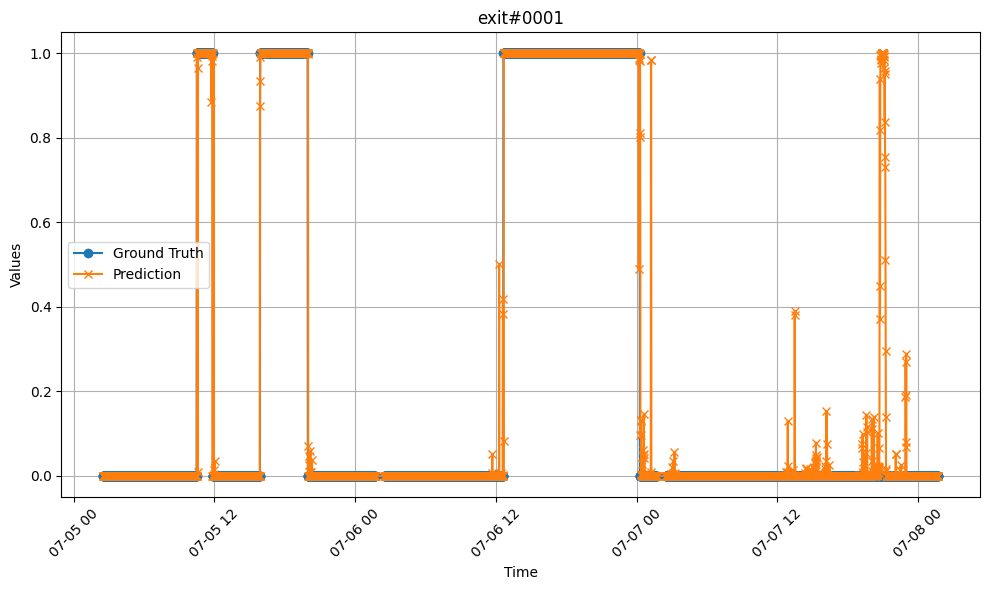

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.exit.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.exit.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.exit.tsv


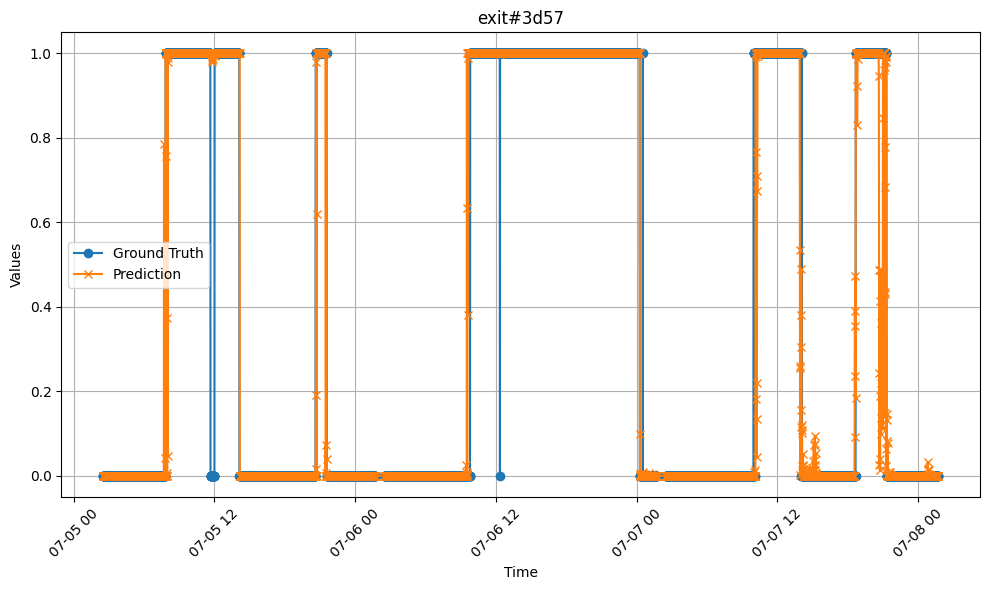

 toileting
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.toileting.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.toileting.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.toileting.tsv


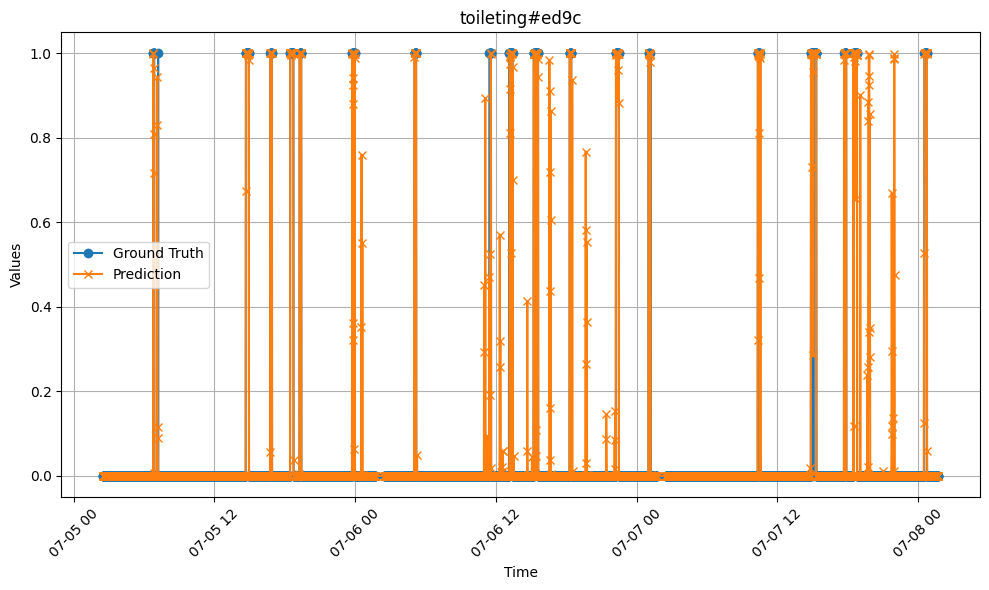

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.toileting.tsv
./data-har//DAY_19910/act/PREDICTION.0001.toileting.tsv
./data-har//DAY_19911/act/PREDICTION.0001.toileting.tsv


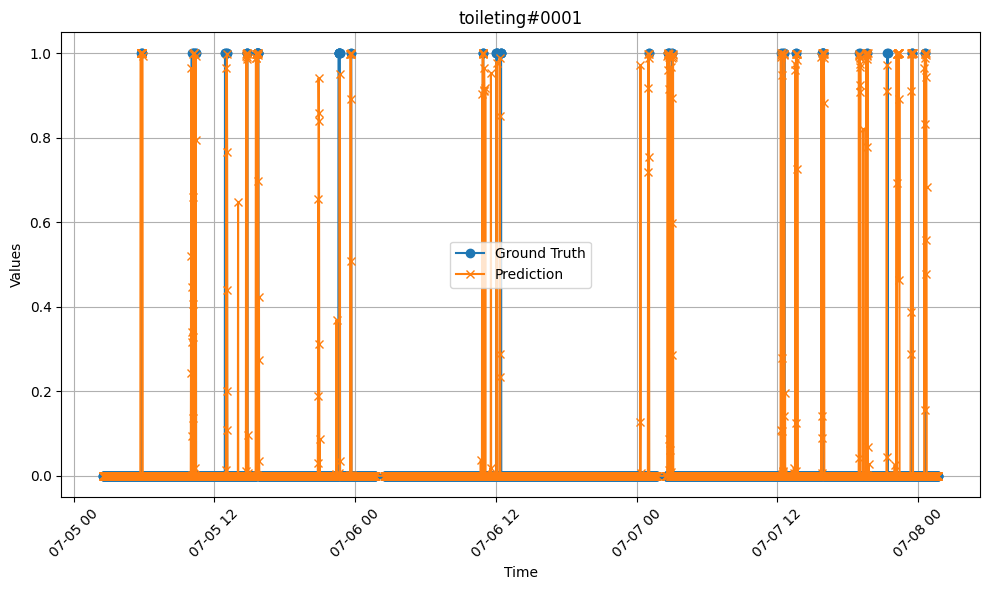

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.toileting.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.toileting.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.toileting.tsv


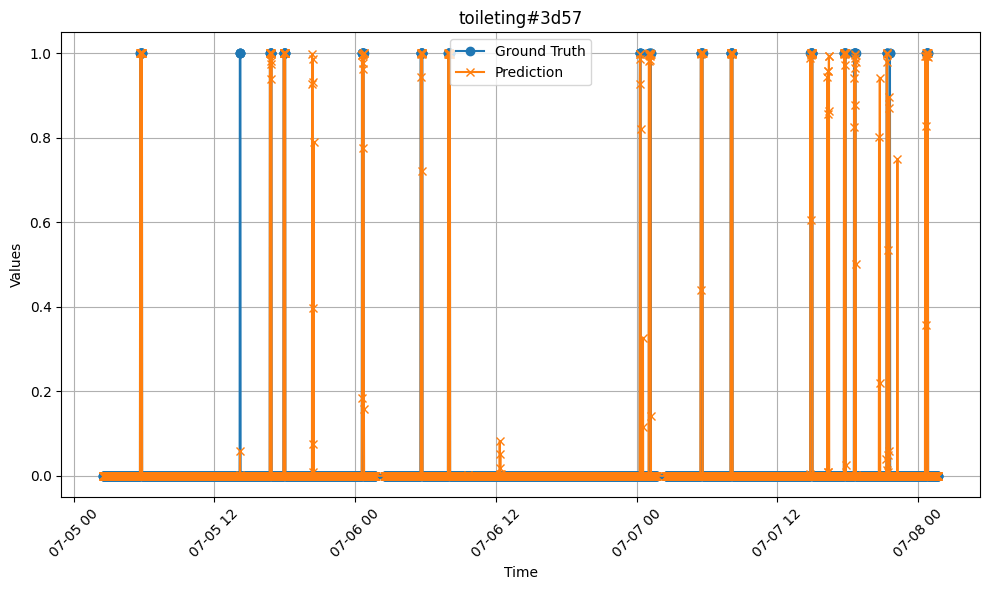

 shower
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.shower.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.shower.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.shower.tsv


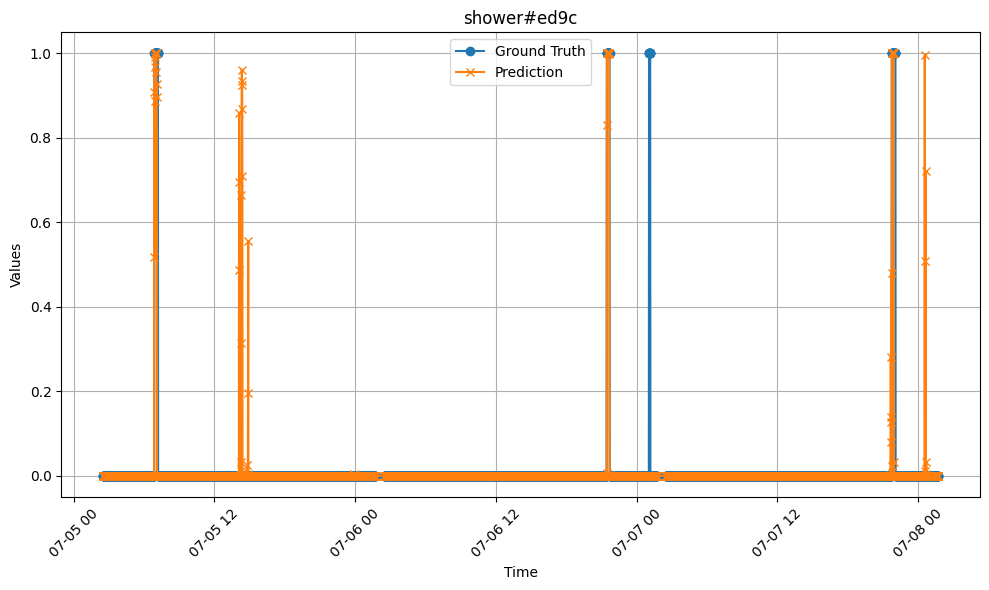

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.shower.tsv
./data-har//DAY_19910/act/PREDICTION.0001.shower.tsv
./data-har//DAY_19911/act/PREDICTION.0001.shower.tsv


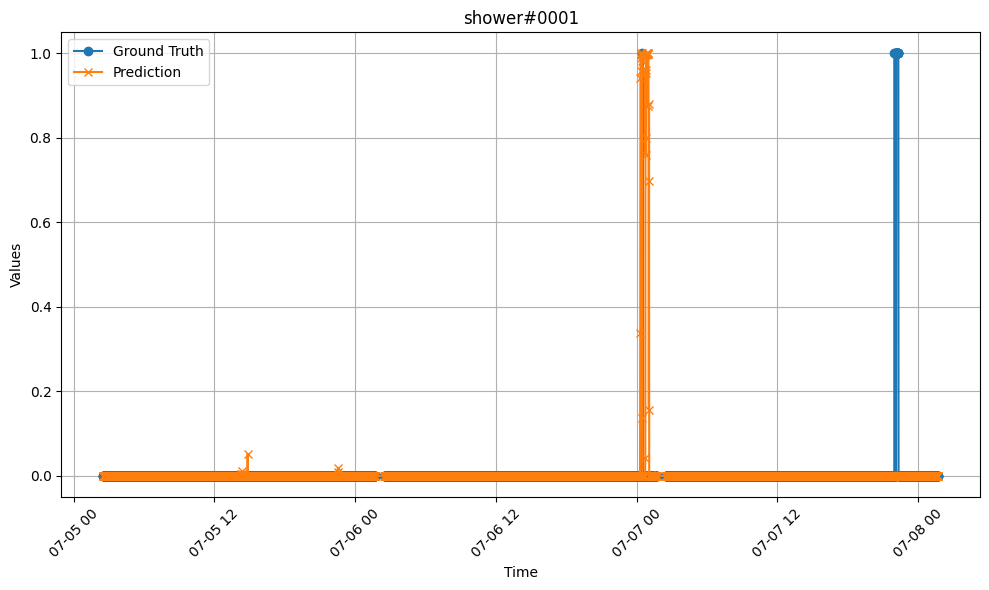

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.shower.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.shower.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.shower.tsv


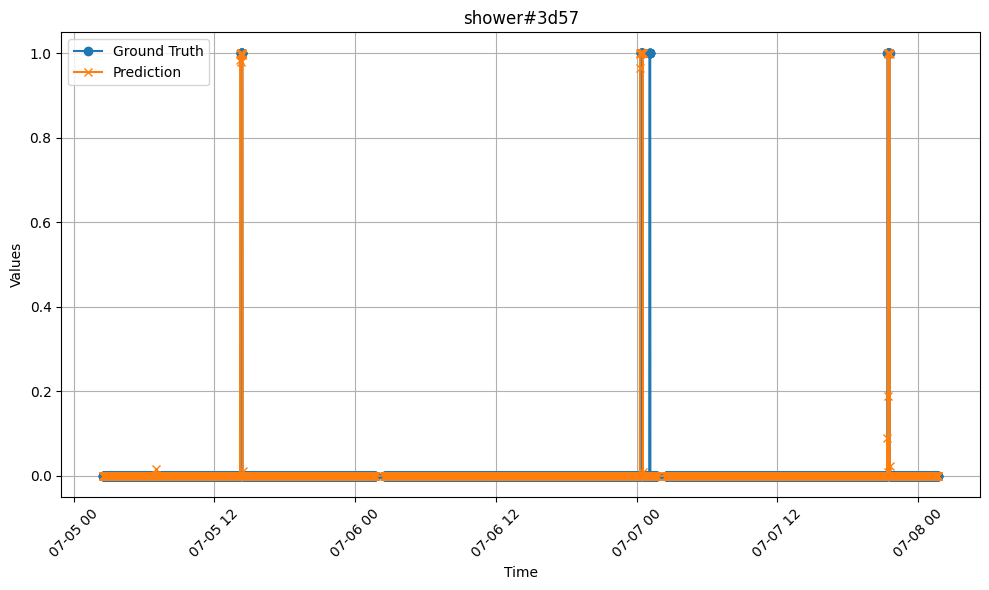

 pc
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.pc.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.pc.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.pc.tsv


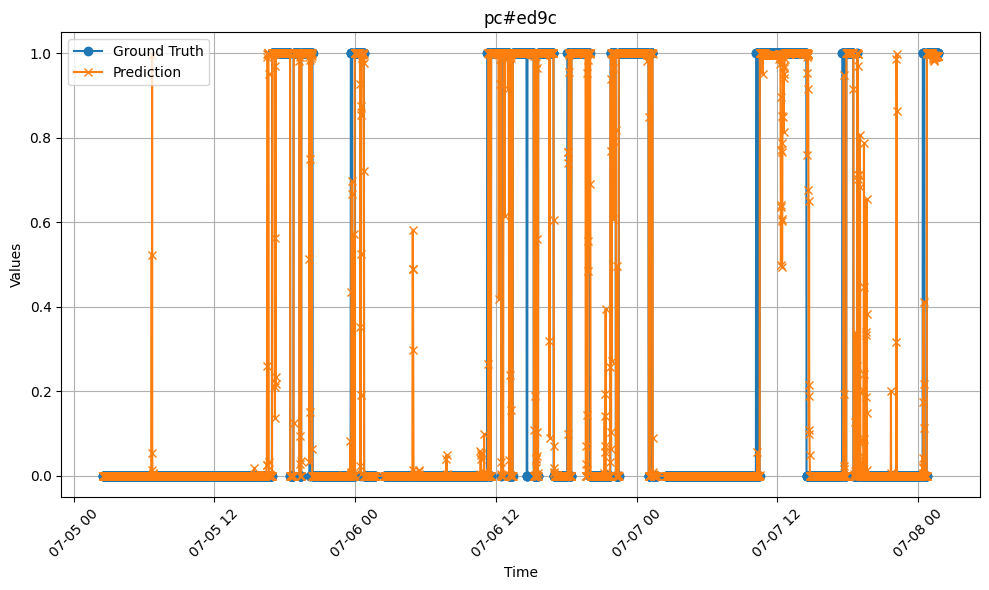

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.pc.tsv
./data-har//DAY_19910/act/PREDICTION.0001.pc.tsv
./data-har//DAY_19911/act/PREDICTION.0001.pc.tsv


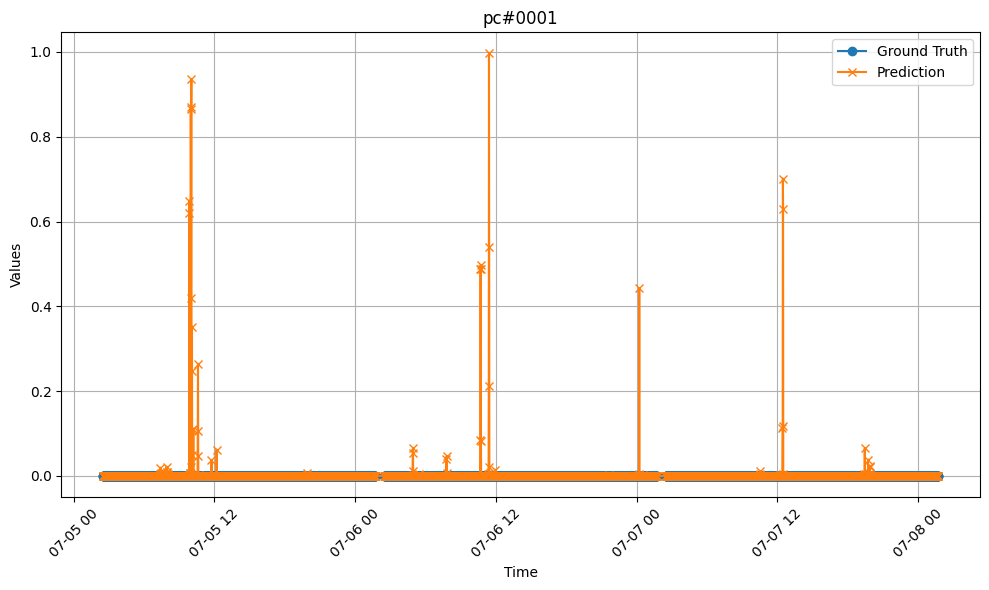

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.pc.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.pc.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.pc.tsv


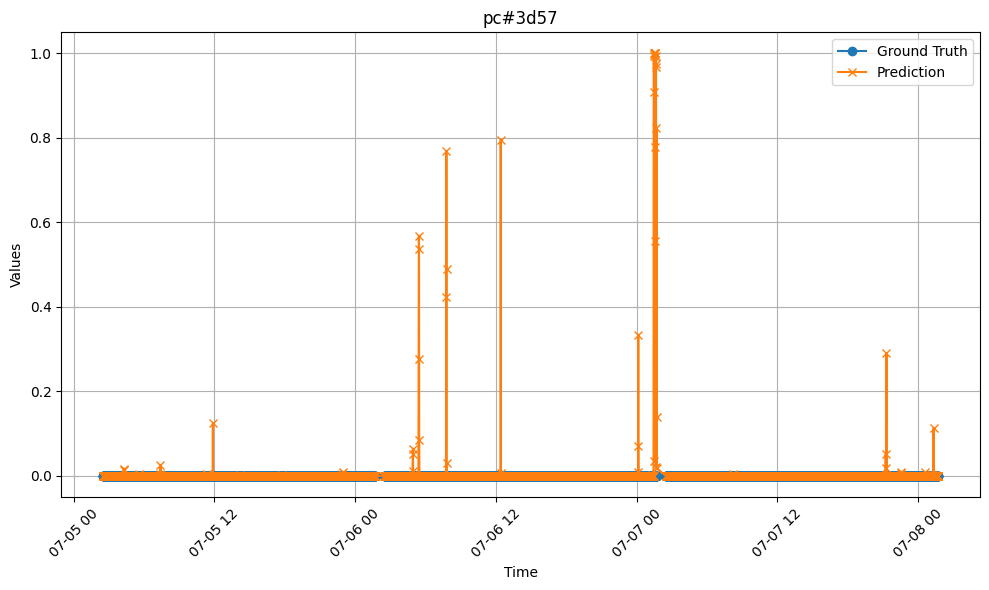

 sleep
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.sleep.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.sleep.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.sleep.tsv


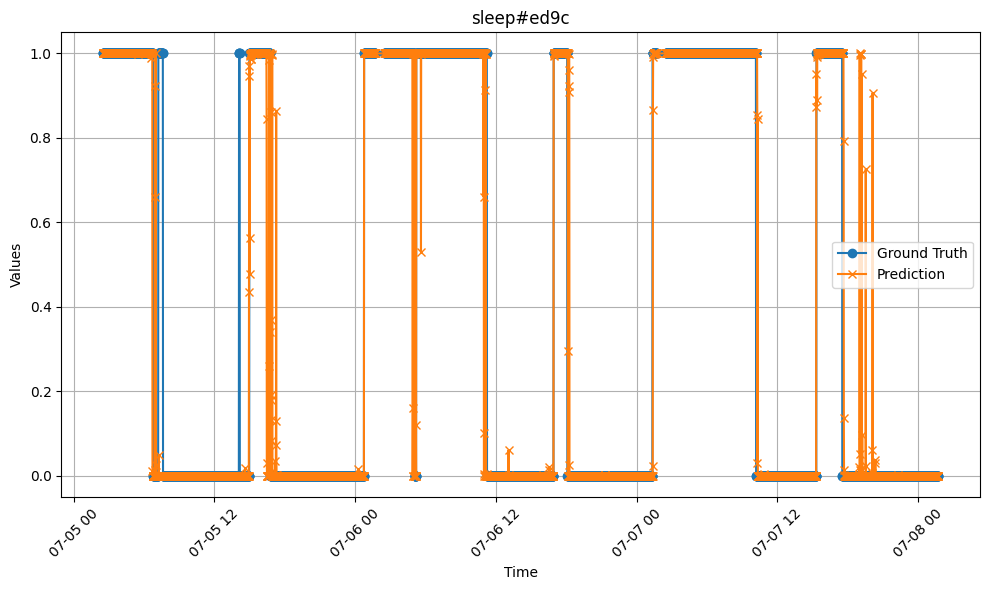

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.sleep.tsv
./data-har//DAY_19910/act/PREDICTION.0001.sleep.tsv
./data-har//DAY_19911/act/PREDICTION.0001.sleep.tsv


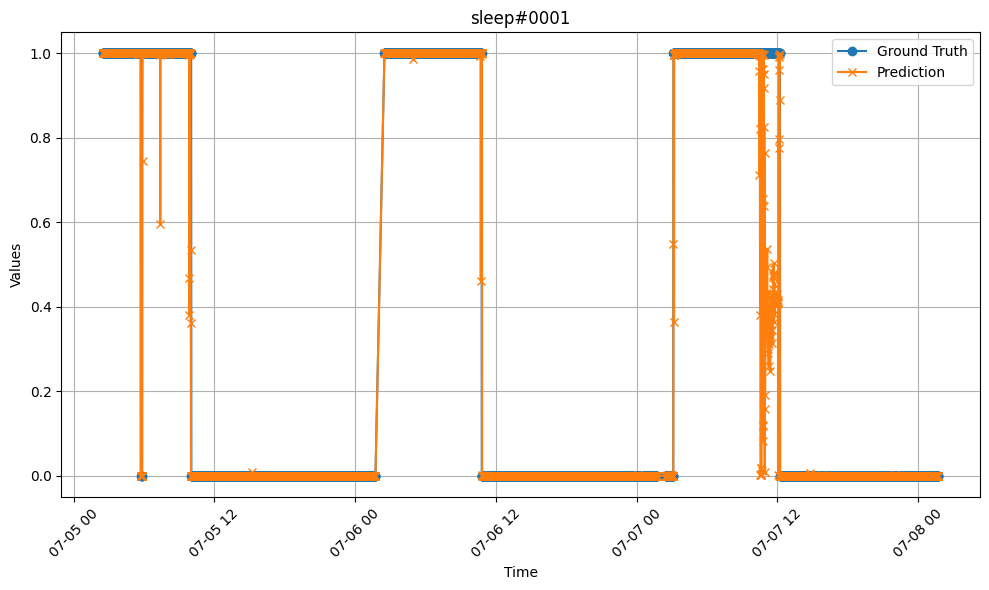

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.sleep.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.sleep.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.sleep.tsv


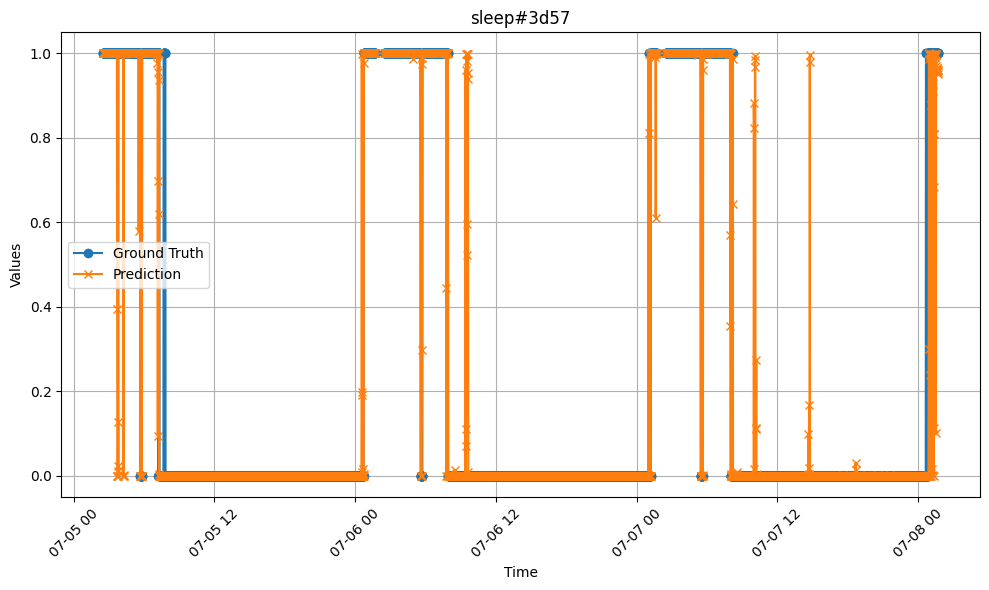

 kitchen
	 ed9c
./data-har//DAY_19909/act/PREDICTION.ed9c.kitchen.tsv
./data-har//DAY_19910/act/PREDICTION.ed9c.kitchen.tsv
./data-har//DAY_19911/act/PREDICTION.ed9c.kitchen.tsv


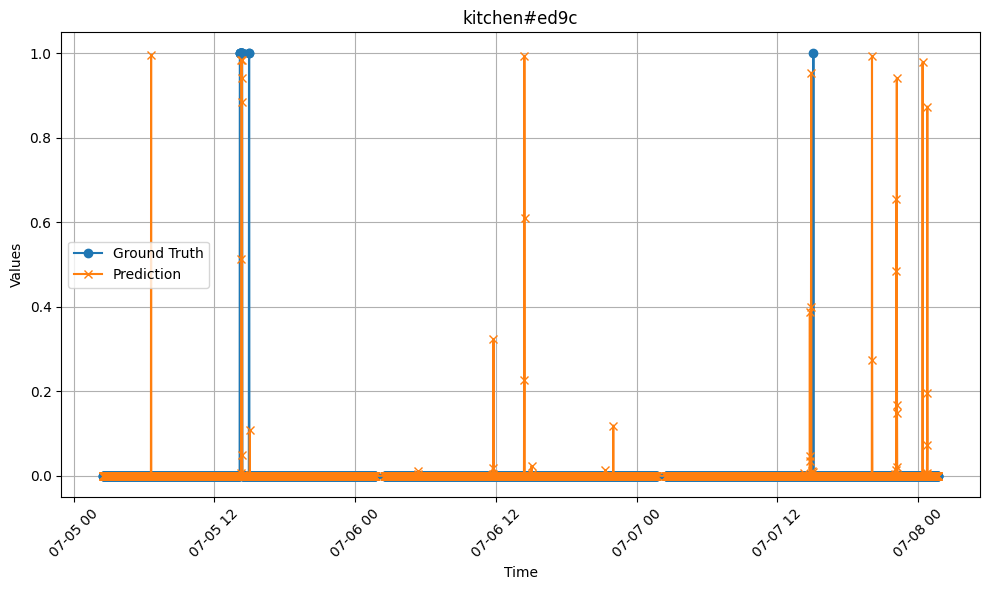

	 0001
./data-har//DAY_19909/act/PREDICTION.0001.kitchen.tsv
./data-har//DAY_19910/act/PREDICTION.0001.kitchen.tsv
./data-har//DAY_19911/act/PREDICTION.0001.kitchen.tsv


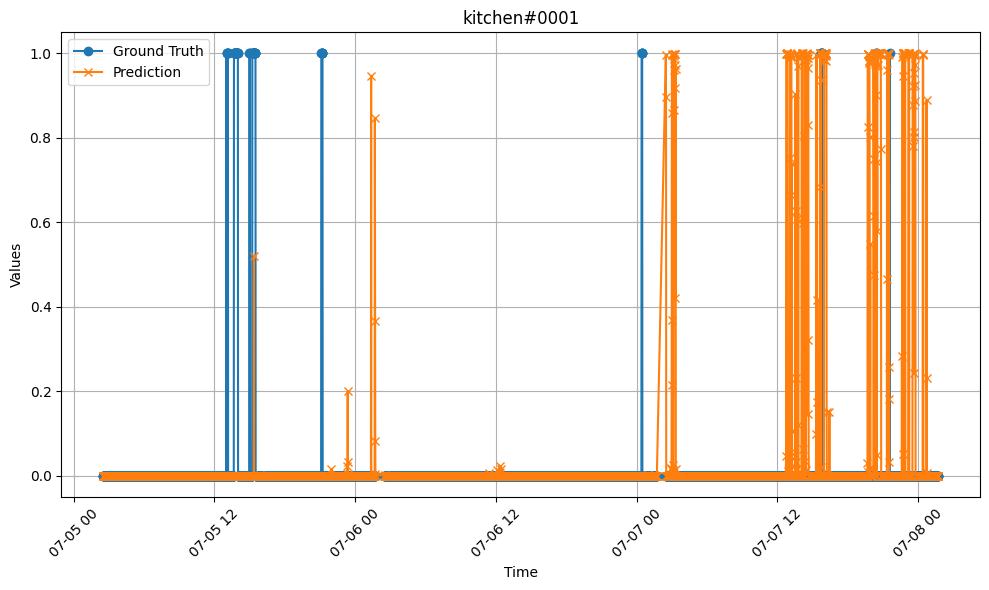

	 3d57
./data-har//DAY_19909/act/PREDICTION.3d57.kitchen.tsv
./data-har//DAY_19910/act/PREDICTION.3d57.kitchen.tsv
./data-har//DAY_19911/act/PREDICTION.3d57.kitchen.tsv


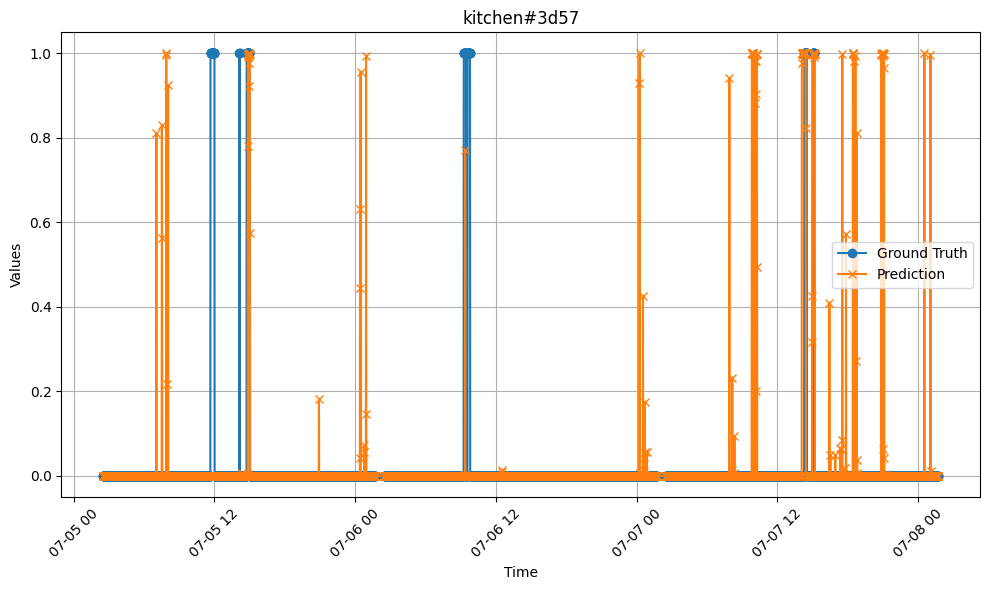

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


import os
import pandas as pd

def clean_file_content(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    cleaned_lines = [line.lstrip('\t') for line in lines]
    return cleaned_lines



# Clean the file content and save to a temporary file


loc_user=np.zeros((len(activities),len(users),len(days),sizeT(t0,tN)))
print(loc_user.shape)
for ax,activity in enumerate(activities):
    print("",activity)
    for ux,user in enumerate(users):
        print("\t",user)
    
        df=None
        for dx,day in enumerate(days):
            print(processed_data_folder+"/DAY_"+str(day)+"/act/PREDICTION."+user+"."+activity+".tsv")
            df_day1=read_csv(processed_data_folder+"/DAY_"+str(day)+"/act/PREDICTION."+user+"."+activity+".tsv", sep="\t",parse_dates=True, header=None,names=['Time', 'Ground Truth', 'Prediction'])
            if df is None:
                df=df_day1
            else:
                df = pd.concat([df, df_day1])

        # Convert the Time column to datetime format
        df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
        #print(df['Time'])
        #print(df['Ground Truth'])
        #print(df['Prediction'])
        
        # Sort by Time if needed (optional)
        df = df.sort_values(by='Time')
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time'], df['Ground Truth'], label='Ground Truth', marker='o')
        plt.plot(df['Time'], df['Prediction'], label='Prediction', marker='x')
        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.title(activity+"#"+user)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Show the plot
        plt.show()
        